# XOR Multiple Inputs/Targets

Testing...

In [1]:
from conx import Network, Layer, SGD

conx, version 3.4.0
Using Theano backend.


In [2]:
net = Network("XOR Network", 2, 4, 1, activation="sigmoid")

In [3]:
net.compile(loss='mean_squared_error',
            optimizer=SGD(lr=0.3, momentum=0.9))

In [4]:
dataset = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0])
]
net["output"].minmax = (0, 1)

In [5]:
net.dataset.load(dataset)
net.dataset.summary()

Input Summary:
   count  : 4 (4 for training, 0 for testing)
   shape  : [(2,)]
   range  : (0.0, 1.0)
Target Summary:
   count  : 4 (4 for training, 0 for testing)
   shape  : [(1,)]
   range  : (0.0, 1.0)


In [6]:
net.dataset.targets[0]

[0.0]

In [7]:
net.dataset.inputs.shape

[(2,)]

In [8]:
net.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=3), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'XOR Network\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 265" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">XOR Network</text><rect x="149.0" y="29" width="52" height="52" style="fill:none;stroke:black;stroke-width:2"/><image id="XOR Network_output_1" class="XOR Network_output" x="150.0" y="30" height="50" width="50" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhAQABAIcAAO3t/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAAQABAAAIBQABsAsIADs="><title>Layer: output (output)\n shape = (1,)\n Keras class = Dense\n activation = sigmoid</title></image><text x="205.0" y="57.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="109" x2="175.0" y2="82" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from hidden to output\n output/kernel has shape (4, 1)\n output/bias has shape (1,)</title></line><rect x="74.0" y="109" width="202" height="52" style="fill:none;stroke:black;stroke-width:2"/><image id="XOR Network_hidden_2" class="XOR Network_hidden" x="75.0" y="110" height="50" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhBAABAIcAAAAA/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [9]:
net.propagate([0, 0])

[0.5188825726509094]

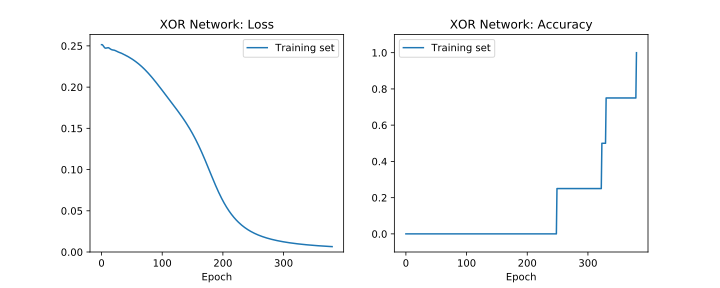

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#  380 |   0.00652 |   1.00000 


In [10]:
net.reset()
net.train(epochs=2000, accuracy=1.0, report_rate=25, plot=True)

In [11]:
net.test()

Testing train dataset with tolerance 0.1000...
Total count: 1
      correct: 1
      incorrect: 0
Total percentage correct: 1.0


In [12]:
net.propagate_to("input", [0, 1])

[0.0, 1.0]

In [13]:
net.propagate([0.5, 0.5])

[0.37886133790016174]

In [14]:
net.propagate_to("hidden", [1, 0])

[0.19043518602848053,
 0.9795732498168945,
 0.9983406066894531,
 0.7423139810562134]

In [15]:
net.propagate_to("output", [1, 1])

[0.09938135743141174]

In [16]:
net.propagate_to("input", [0.25, 0.25])

[0.25, 0.25]

In [17]:
net.propagate_from("input", [1.0, 1.0])

[0.099381357]

In [18]:
net.propagate_from("hidden", [1.0, 0.0, 1.0, -1.0])

[1.312265e-06]

In [19]:
net.test()

Testing train dataset with tolerance 0.1000...
Total count: 1
      correct: 1
      incorrect: 0
Total percentage correct: 1.0


In [20]:
from conx import Network, Layer, SGD

In [21]:
net = Network("XOR2 Network")
net.add(Layer("input1", 1))
net.add(Layer("input2", 1))
net.add(Layer("hidden1", 10, activation="sigmoid"))
net.add(Layer("hidden2", 10, activation="sigmoid"))
net.add(Layer("shared-hidden", 5, activation="sigmoid"))
net.add(Layer("output1", 1, activation="sigmoid", minmax=(-1,1)))
net.add(Layer("output2", 1, activation="sigmoid", minmax=(-1,1)))

In [22]:
net

<Network name='XOR2 Network' (uncompiled)>

In [23]:
net.connect("input1", "hidden1")
net.connect("input2", "hidden2")
net.connect("hidden1", "shared-hidden")
net.connect("hidden2", "shared-hidden")
net.connect("shared-hidden", "output1")
net.connect("shared-hidden", "output2")

In [24]:
net.layers[2].incoming_connections

[<Layer name='input1', shape=(1,), act='None'>]

In [25]:
net.compile(loss='mean_squared_error',
            optimizer=SGD(lr=0.3, momentum=0.9))

In [26]:
net.config["hspace"] = 200
net.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=0), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'XOR2 Network\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 800 310" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="400.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">XOR2 Network</text><rect x="240.66666666666669" y="29" width="52" height="52" style="fill:none;stroke:black;stroke-width:2"/><image id="XOR2 Network_output1_1" class="XOR2 Network_output1" x="241.66666666666669" y="30" height="50" width="50" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhAQABAIcAAB0d/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAAQABAAAIBQABmAgIADs="><title>Layer: output1 (output)\n shape = (1,)\n Keras class = Dense\n activation = sigmoid</title></image><text x="296.6666666666667" y="57.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output1</text><rect x="507.33333333333337" y="29" width="52" height="52" style="fill:none;stroke:black;stroke-width:2"/><image id="XOR2 Network_output2_2" class="XOR2 Network_output2" x="508.33333333333337" y="30" height="50" width="50" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhAQABAIcAAAAAxAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [27]:
net.propagate_to_features("hidden1", [[[1], [1]]])

In [28]:
net.propagate([[1], [1]])

[[0.43671050667762756], [0.6797348260879517]]

In [29]:
dataset = [
    ([[0],[0]], [[0],[0]]),
    ([[0],[1]], [[1],[1]]),
    ([[1],[0]], [[1],[1]]),
    ([[1],[1]], [[0],[0]])
]

In [30]:
net.dataset.load(dataset)

In [31]:
net.get_weights("hidden2")

[[[0.4540221095085144,
   0.08793536573648453,
   -0.1828816831111908,
   -0.5521659851074219,
   0.32966530323028564,
   -0.686873197555542,
   0.3806053698062897,
   -0.25110286474227905,
   0.21008996665477753,
   0.04664979130029678]],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [32]:
net.propagate([[1], [1]])

[[0.43671050667762756], [0.6797348260879517]]

In [33]:
net

<IPython.core.display.Javascript object>

<Network name='XOR2 Network' (compiled)>

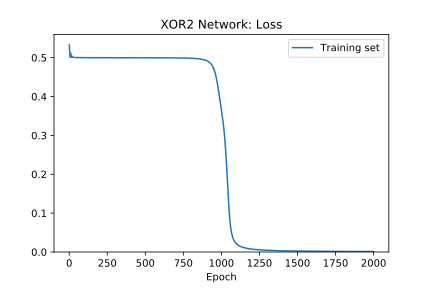

In [34]:
for i in range(20):
    (epoch_count, results) = net.train(epochs=100, verbose=0, report_rate=25, plot=True)
    for index in range(4):
        net.propagate(dataset[index][0])

In [35]:
net.reset()

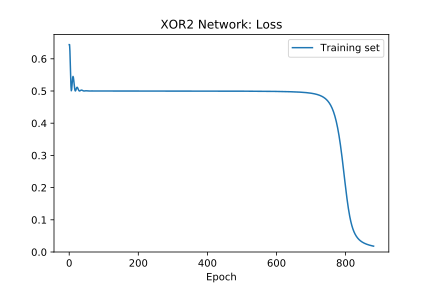

       |  Training |   output1 |   output2 
Epochs |     Error |       acc |       acc 
------ | --------- | --------- | --------- 
#  881 |   0.01815 |   1.00000 |   1.00000 


In [36]:
net.train(epochs=2000, accuracy=1.0, report_rate=25, plot=True)

In [37]:
net.propagate_from("shared-hidden", [0.0] * 5)

[[0.8253845], [0.82618642]]

In [38]:
net.propagate_to("hidden1", [[1], [1]])

[0.73835289478302,
 0.8181569576263428,
 0.7488211393356323,
 0.21614700555801392,
 0.8158043026924133,
 0.13216380774974823,
 0.19218505918979645,
 0.8437826037406921,
 0.7830644249916077,
 0.8318384289741516]

In [39]:
net.test()

Testing train dataset with tolerance 0.1000...
Total count: 4
      correct: 4
      incorrect: 0
Total percentage correct: 1.0


In [40]:
net.dataset.slice(2)

In [41]:
net.train(epochs=2000, accuracy=1.0, report_rate=25)

No training required: accuracy already to desired value
Training dataset status:
       |  Training |   output1 |   output2 
Epochs |     Error |       acc |       acc 
------ | --------- | --------- | --------- 
#  881 |   0.01815 |   1.00000 |   1.00000 


# Conx model is a Keras Model

Requires:

* pip install pydot-ng

In [42]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import HTML

In [43]:
dot = model_to_dot(net.model, rankdir="BT")

In [44]:
HTML(dot.create_svg().decode())